# Bernoulli - Estimación del parámetro por Maxima Verosimilitud

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Generar datos simulados
np.random.seed(123)

N = 100 #numero de observaciones
theta = 0.3 #parametro de la dist. Bernoulli
X = np.random.binomial(1, theta, N)

De la presentación vista en clase sabemos que la verosimilitud de los datos esta dada como
$ p(\mathcal{D}|\theta) = \prod_{n=1}^{N} p(x_n|\mu) = \prod_{n=1}^{N} \theta^{x_n}(1-\theta)^{1-x_n} = \theta^{S}(1-\theta)^{N-S}$ <br>
donde $S = \sum_{n=1}^{N} x_n$.<br>
Para determinar el parámetro que maximiza dicha verosimilitud, tomamos el logaritmo
$ \log p(\mathcal{D}|\theta) = S \log(\theta) + (N-S)\log(1-\theta)$. <br>
Derivando la expresion anterior con respecto a $\theta$ e igualandola a cero, se tiene <br>
$ \frac{\partial}{\partial \theta}\log p(\mathcal{D}|\theta) = 0 =\frac{S}{\theta}- \frac{N-S}{1-\theta}$. <br>
Despejando $\theta$, obtenemos <br>
$\theta_{\text{ML}} = \frac{S}{N} = \frac{1}{N} \sum_{n=1}^{N} x_n$

In [39]:
theta_es = np.sum(X)/N #Estimacion Puntual de theta
print(theta_es)

0.22


(array([78.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 22.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

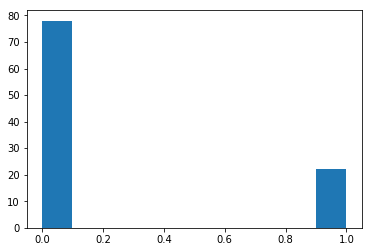

In [40]:
plt.hist(X,10)

Podemos hacer una estimacion de la distibucion del estimador del parametro a partir de diferentes estimaciones de $\theta$.

(array([ 2.,  3., 11., 13., 17., 19., 12., 12.,  8.,  3.]),
 array([0.19 , 0.211, 0.232, 0.253, 0.274, 0.295, 0.316, 0.337, 0.358,
        0.379, 0.4  ]),
 <a list of 10 Patch objects>)

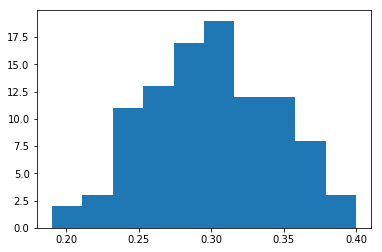

In [43]:
theta_ml = np.zeros((100,1)) #Vector para almacenar diferentes estimaciones de theta
for k in range(100):
  X = np.random.binomial(1, theta, N)
  theta2[k] = np.mean(X)

plt.hist(theta2)

# Beta-Bernoulli - Probabilidad posterior del parámetro

In [0]:
from scipy import stats

S = np.sum(X)

De la presentacion de variables continuas, sabemos que el posterior esta dado por: <br>
$p(\theta|\mathcal{D}) = \text{Beta}(S+\alpha,\beta-S)$.<br>
Entonces, la distribucion del posterior puede variar de acuerdo a los parametros del prior $\alpha$ y $\beta$.

(array([0.95238095, 1.42857143, 5.23809524, 6.19047619, 8.0952381 ,
        9.04761905, 5.71428571, 5.71428571, 3.80952381, 1.42857143]),
 array([0.19 , 0.211, 0.232, 0.253, 0.274, 0.295, 0.316, 0.337, 0.358,
        0.379, 0.4  ]),
 <a list of 10 Patch objects>)

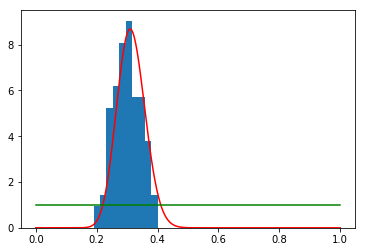

In [74]:
a = 1.
b = 1.
X2 = np.linspace(0,1, 1000)

plt.plot(X2, stats.beta(S+a,N+b-S).pdf(X2), 'r');
# Plot the prior
plt.plot(X2, stats.beta(a, b).pdf(X2), 'g');
plt.hist(theta2,10, density=True)

La media del posterior esta dada por <br>
$E[\theta|\mathcal{D}] =\frac{S+a}{N+a+b} $

In [75]:
E_theta = (S+a)/(N+a+b)
print(E_theta)

0.3137254901960784
